In [1]:
cd

/Users/keith_tetrad


In [2]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

Read in sample barcode counts

In [3]:
codon_variants = pd.read_csv('kw_dms/old_results/variants/codon_variants.csv')

In [4]:
codon_variants

,target,library,barcode,variant_call_support,codon_substitutions,aa_substitutions,n_codon_substitutions,n_aa_substitutions
0,gene,LibA,AAAAAAAAAAAAAACT,5,GAC78GCC AAG111AGG,D78A K111R,2,2
1,gene,LibA,AAAAAAAAAAATGTAC,9,TTC978ACG,F978T,1,1
2,gene,LibA,AAAAAAAAAACCCCCA,5,NaN,NaN,0,0
3,gene,LibA,AAAAAAAAACACTACT,10,NaN,NaN,0,0
4,gene,LibA,AAAAAAAAACTTCAAT,9,TTC152GAC AGG270AAG CAC951GCC GCT986GCC,F152D R270K H951A,4,3
...,...,...,...,...,...,...,...,...
360136,neut_standard,LibC,CGTGGCGTTTACACTA,311,neut_standard,neut_standard,0,0
360137,neut_standard,LibC,GCGATTCACGCGTTGG,311,neut_standard,neut_standard,0,0
360138,neut_standard,LibC,GTGCAGTAGTAAAGTA,311,neut_standard,neut_standard,0,0
360139,neut_standard,LibC,TACCCATGGATACGAT,311,neut_standard,neut_standard,0,0


In [5]:
dataframes = {
    'uninfected': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-uninfected-1_counts.csv'),
    'sample_4u8c_B1T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-4u8c_bio1-1_counts.csv'),
    'sample_4u8c_B2T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-4u8c_bio2-1_counts.csv'),
    'sample_4u8c_B2T2': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-4u8c_bio2-2_counts.csv'),
    'sample_Both_B1T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Both_bio1-1_counts.csv'),
    'sample_Both_B2T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Both_bio2-1_counts.csv'),
    'sample_C7_B1T2': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-C7_bio1-2_counts.csv'),
    'sample_C7_B2T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-C7_bio2-1_counts.csv'),
    'sample_DMSO_B1T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-DMSO_bio1-1_counts.csv'),
    'sample_DMSO_B1T2': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-DMSO_bio1-2_counts.csv'),
    'sample_DMSO_B2T1': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-DMSO_bio2-1_counts.csv'),
    'sample_DMSO_B2T2': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-DMSO_bio2-2_counts.csv'),
    'sample_DMSO_B1_1X': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Spike_DMSO_bio1_1X-1_counts.csv'),
    'sample_DMSO_B1_5X': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Spike_DMSO_bio1_5X-1_counts.csv'),
    'sample_DMSO_B1_10X': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Spike_DMSO_bio1_10X-1_counts.csv'),
    'sample_DMSO_B2_1X': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Spike_DMSO_bio2_1X-1_counts.csv'),
    'sample_DMSO_B2_5X': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Spike_DMSO_bio2_5X-1_counts.csv'),
    'sample_DMSO_B2_10X': pd.read_csv('kw_dms/old_results/barcode_counts/LibB-231017-Spike_DMSO_bio2_10X-1_counts.csv')
}

In [6]:
sample_names = list(dataframes.keys())  # Extracting DataFrame names

Barchart for displaying the number of barcodes in each count bin

In [7]:
# # Adjust 'ncols' as necessary depending on the number of DataFrames
# fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  # Adjust as necessary
# fig.tight_layout(pad=5.0)

# # Iterate over each dataframe name and corresponding subplot axis
# for name, ax in zip(sample_names, axes.flatten()):
#     temp_df = dataframes[name]  # Access the dataframe from the dictionary
    
#     # Calculate the percentage of barcodes with count > 3
#     percentage = (temp_df['count'] > 3).mean() * 100
    
#     sns.histplot(data=temp_df, x='count', ax=ax, bins=30, kde=False)
#     ax.set_yscale('log')
#     ax.set_title(name)
#     ax.set_xlabel('Count')
#     ax.set_ylabel('Number of Barcodes')
    
#     # Add text displaying the percentage
#     ax.text(0.95, 0.95, f'{percentage:.2f}% Barcodes > 3 Counts', 
#             transform=ax.transAxes, 
#             horizontalalignment='right', 
#             verticalalignment='top')

# # If you want to save the figure, uncomment the line below
# # plt.savefig('barcode_histograms_big_bins.svg')

# # To display the plot, uncomment the line below
# plt.show()

Dot plot comparing barcode counts for every barcode between samples

In [8]:
# # Sample groups
# sample_groups = [
#     ("sample_4u8c_B1T1", "sample_4u8c_B2T1"),
#     ("sample_Both_B1T1", "sample_Both_B2T1"),
#     ("sample_C7_B1T2", "sample_C7_B2T1"),
#     ("sample_DMSO_B1T1", "sample_DMSO_B2T1"),
# ]

# for group_index, group in enumerate(sample_groups):
#     # Number of plots for the current group
#     num_plots = len(group) * (len(group) - 1) // 2

#     # Set up subplots
#     fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

#     # Counter for the subplot index
#     plot_index = 0

#     # Iterate through each pair of samples
#     for i in range(len(group)):
#         for j in range(i + 1, len(group)):
#             # Merge the two dataframes on 'barcode'
#             merged_df = pd.merge(dataframes[group[i]], dataframes[group[j]], on='barcode', suffixes=('_left', '_right'))

#             # Define a function to determine the color based on the criteria
#             def determine_color(row):
#                 if row['count_left'] < 3 or row['count_right'] < 3:
#                     return '#5677A4'  # Color for invalid
#                 else:
#                     return '#E68B39'  # Color for valid

#             # Apply the function to each row
#             colors = merged_df.apply(determine_color, axis=1)
            
#             # Plot
#             ax = axes[plot_index] if num_plots > 1 else axes
#             ax.scatter(merged_df['count_left'], merged_df['count_right'], c=colors)
#             ax.set_xlabel(f'{group[i]} Count')
#             ax.set_ylabel(f'{group[j]} Count')
#             ax.set_title(f'{group[i]} vs {group[j]}')
            
#             # Calculate the percentage of valid counts (>3) for each pair
#             valid_percentage = ((merged_df['count_left'] > 3) & (merged_df['count_right'] > 3)).mean() * 100
            
#             # Perform linear regression
#             X = sm.add_constant(merged_df['count_left'])
#             Y = merged_df['count_right']
#             model = sm.OLS(Y, X).fit()
#             r_squared = model.rsquared
#             predicted_values = model.predict(X)
            
#             # Display the valid percentage
#             ax.text(0.05, 0.90, f'{valid_percentage:.2f}% Barcodes >3 Counts', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            
#             # Display R² value
#             ax.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
#             ax.plot(merged_df['count_left'], predicted_values, color='black', linewidth=2)

#             plot_index += 1

#     plt.tight_layout()
#     plt.show()
    
#     # Constructing a unique filename for each figure
#     #filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
#     #fig.savefig(filename, format='png', dpi=600)


merging n_aa and n_codon mutations so I can color the above graph based on n_mutations

In [10]:
dataframes_nmuts = {}  # Use a dictionary to store new DataFrame references

for sample_name, df in dataframes.items():
    # Construct the name of the new dataframe
    new_df_name = sample_name + '_nmuts'

    # Call the function and assign the result to the new dataframe name in the dictionary
    dataframes_nmuts[new_df_name] = pd.merge(dataframes[sample_name],codon_variants[['barcode','n_codon_substitutions','n_aa_substitutions']], on='barcode', how='left')


In [11]:
# Sample groups
sample_groups = [
    ("sample_4u8c_B1T1_nmuts", "sample_4u8c_B2T1_nmuts"),
    ("sample_Both_B1T1_nmuts", "sample_Both_B2T1_nmuts"),
    ("sample_C7_B1T2_nmuts", "sample_C7_B2T1_nmuts"),
    ("sample_DMSO_B1T1_nmuts", "sample_DMSO_B2T1_nmuts"),
]

In [12]:
for name in sample_groups[0]:  # Checking the first pair as an example
    print(name, "columns:", dataframes_nmuts[name].columns)
    print(dataframes_nmuts[name].head())  # Display the first few rows


sample_4u8c_B1T1_nmuts columns: Index(['barcode', 'count', 'n_codon_substitutions', 'n_aa_substitutions'], dtype='object')
            barcode  count  n_codon_substitutions  n_aa_substitutions
0  CCCACCAAACAGAACA  15224                      0                   0
1  CCAAACGGTATGATGA  14307                      5                   5
2  TGCAAATACATTAGCT  13665                      2                   1
3  CGTATGAAACCCTACG   9802                      3                   2
4  GCACTCGACAGGACTA   9436                      2                   2
sample_4u8c_B2T1_nmuts columns: Index(['barcode', 'count', 'n_codon_substitutions', 'n_aa_substitutions'], dtype='object')
            barcode  count  n_codon_substitutions  n_aa_substitutions
0  CCAAACGGTATGATGA  17188                      5                   5
1  CCCACCAAACAGAACA  17024                      0                   0
2  TGCAAATACATTAGCT  15519                      2                   1
3  AACAATTAGCAGGGAT  13543                      1     

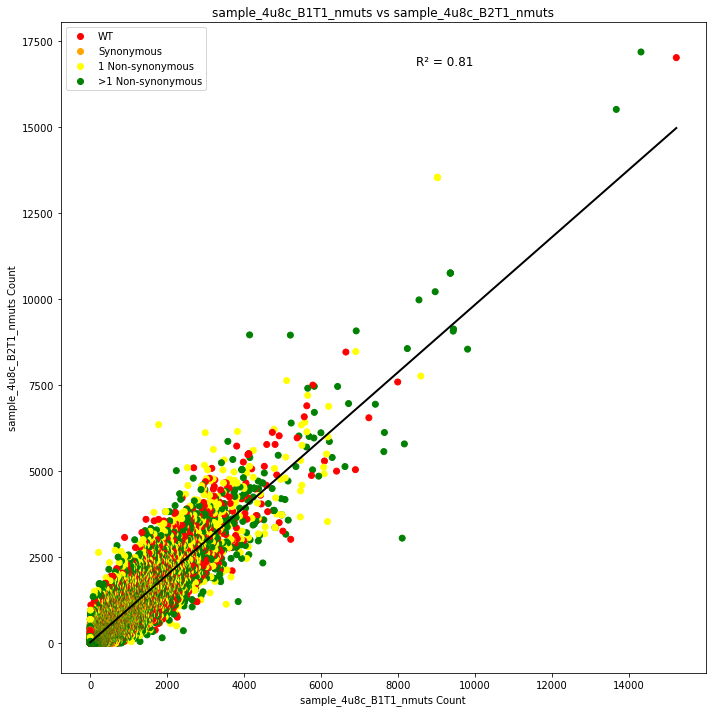

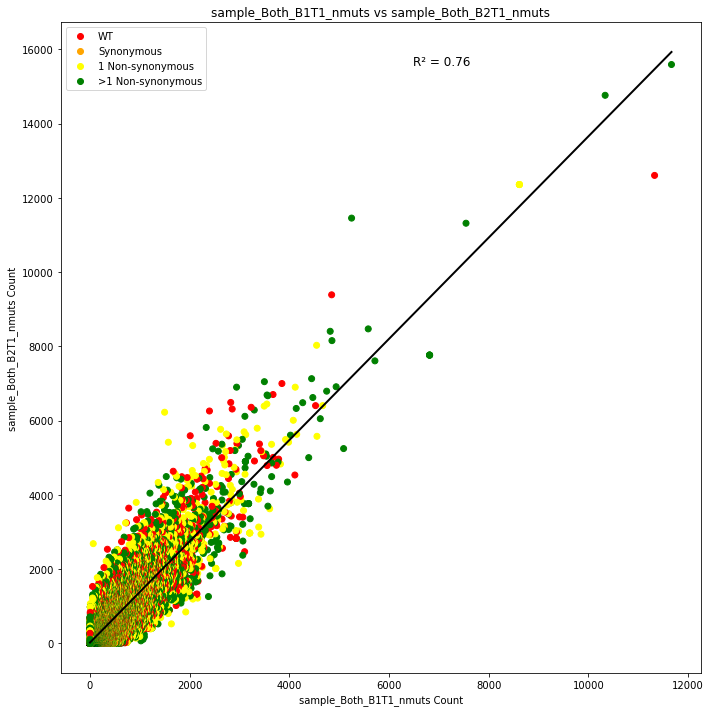

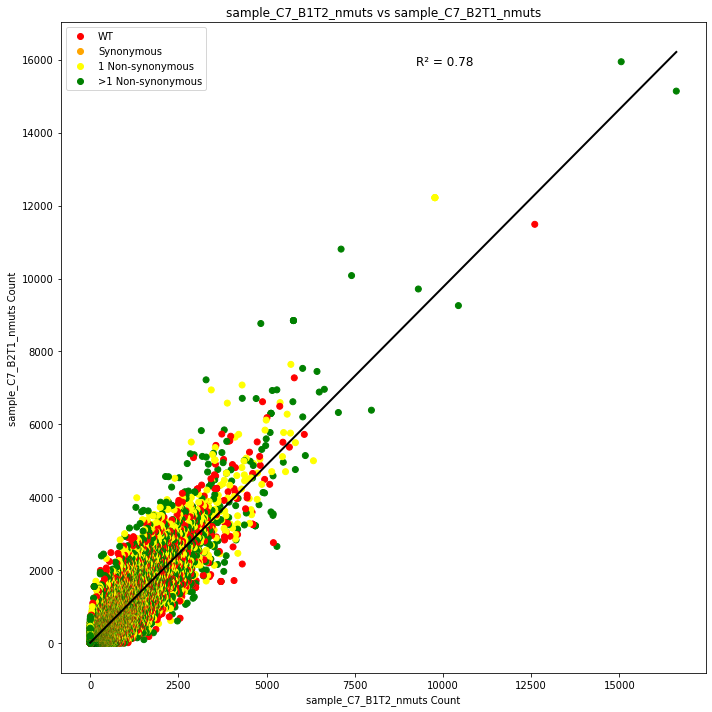

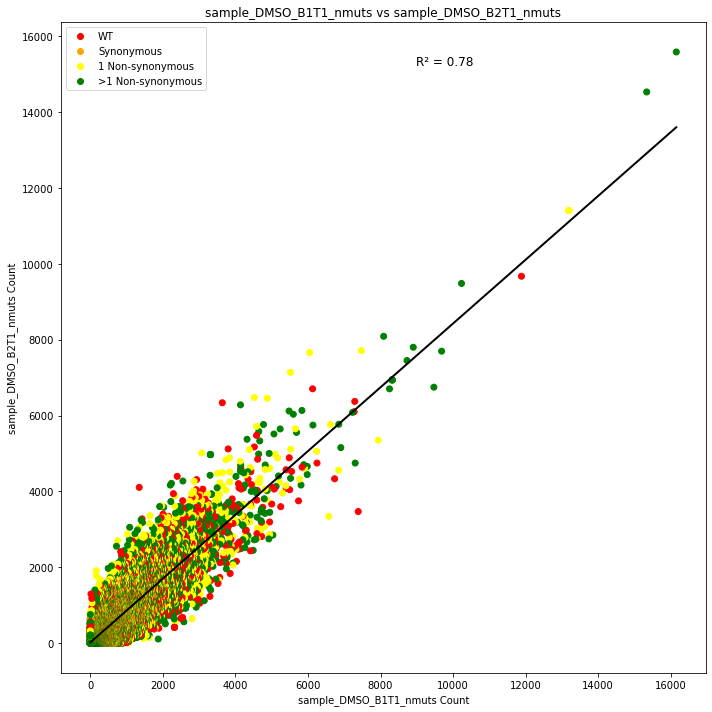

In [29]:
def determine_color(n_aa_substitutions, n_codon_substitutions):
    if n_codon_substitutions == 0 and n_aa_substitutions == 0:
        return 'red'  # WT
    elif n_aa_substitutions == 0 and n_codon_substitutions > 0:
        return 'orange'  # Synonymous
    elif n_aa_substitutions == 1:
        return 'yellow'  # 1 non-synonymous mutation
    elif n_aa_substitutions > 1 :
        return 'green'  # >1 non-synonymous mutations

for group_index, group in enumerate(sample_groups):
    # Number of plots for the current group
    num_plots = len(group) * (len(group) - 1) // 2

    # Set up subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 10))

    # Counter for the subplot index
    plot_index = 0

    # Iterate through each pair of samples
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            # Merge the two dataframes on 'barcode'
            color_df = pd.merge(dataframes_nmuts[group[i]], dataframes_nmuts[group[j]], on='barcode', suffixes=('_left', '_right'))

           # Apply the function to each row to determine colors using either left or right set of columns
            colors = color_df.apply(lambda row: determine_color(row['n_codon_substitutions_left'], row['n_aa_substitutions_left']), axis=1)

            # Plot
            ax = axes[plot_index] if num_plots > 1 else axes
            ax.scatter(color_df['count_left'], color_df['count_right'], c=colors)
            ax.set_xlabel(f'{group[i]} Count')
            ax.set_ylabel(f'{group[j]} Count')
            ax.set_title(f'{group[i]} vs {group[j]}')
     
            # Perform linear regression
            X = sm.add_constant(color_df['count_left'])
            Y = color_df['count_right']
            model = sm.OLS(Y, X).fit()
            r_squared = model.rsquared
            predicted_values = model.predict(X)
        
            # Display R² value
            ax.text(0.55, 0.95, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.plot(color_df['count_left'], predicted_values, color='black', linewidth=2)

            # Creating a custom legend
            legend_labels = {
                'red': 'WT',
                'orange': 'Synonymous',
                'yellow': '1 Non-synonymous',
                'green': '>1 Non-synonymous'
            }
            markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', linestyle='') for color in legend_labels]
            ax.legend(markers, legend_labels.values())
            
            plot_index += 1

    plt.tight_layout()
    plt.show()
    
    # Constructing a unique filename for each figure
    #filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
    #fig.savefig(filename, format='png', dpi=600)


The following analysis is comparing variant counts between samples 

In [ ]:
# codon_variants = pd.read_csv('kw_dms/old_results/variants/codon_variants.csv', usecols=['library','barcode','codon_substitutions','aa_substitutions'])

In [ ]:
# Handle missing values in 'aa_substitutions'
codon_variants['aa_substitutions'].fillna('NoSubstitution', inplace=True)
codon_variants['aa_substitutions'].replace('', 'NoSubstitution', inplace=True)

# Handle missing values in 'codon_substitutions'
# codon_variants['codon_substitutions'].fillna('NoSubstitution', inplace=True)
# codon_variants['codon_substitutions'].replace('', 'NoSubstitution', inplace=True)


Converting the codon_variants table to seperate each aa_substitution to a new line and the barcodes associated with it

In [ ]:
# Split the 'aa_substitutions' into a list if there are multiple substitutions
codon_variants['aa_substitutions'] = codon_variants['aa_substitutions'].str.split(' ')

# Explode the dataframe so that each aa substitution gets its own row
exploded_codon_variants = codon_variants.explode('aa_substitutions')

# Retain only the desired columns
exploded_codon_variants = exploded_codon_variants[['library', 'barcode','aa_substitutions']]


this function will merge a barcode counts file with the reformated codon variants table to add the number of times each AA has been seen

In [ ]:
def aggregate_aa_substitution_counts(library, barcode_counts_df):
    """
    Aggregates counts for each amino acid substitution based on barcode counts.

    Parameters:
    library (str): library of interest
    barcode_counts_df (DataFrame): Dataframe of barcodes and their counts.

    Returns:
    DataFrame: Aggregated counts for each amino acid substitution, sorted by total count.
    """
    
    # Filter the dataframe by library
    libX = exploded_codon_variants[exploded_codon_variants['library'] == library]
    
    #Group by AA substitutions and aggregate barcodes
    aa_substitution_groups = libX.groupby('aa_substitutions')['barcode'].apply(list).reset_index()

    # Rename columns for clarity
    aa_substitution_groups.columns = ['AA Substitution', 'barcode']

    # Explode the aa_substitution_groups dataframe
    exploded_aa_substitution_groups = aa_substitution_groups.explode('barcode')
    
    # Merge with the barcode counts data
    merged_aa_counts = exploded_aa_substitution_groups.merge(barcode_counts_df, left_on='barcode', right_on='barcode', how='left')

    # Aggregate the counts for each aa substitution
    aa_substitution_counts = merged_aa_counts.groupby('AA Substitution')['count'].sum().reset_index()

    # Rename columns for clarity
    aa_substitution_counts.columns = ['AA Substitution', 'count']

    # Sort by 'count' in descending order
    sorted_aa_substitution_counts = aa_substitution_counts.sort_values(by='count', ascending=False)

    return sorted_aa_substitution_counts

iterate through all of the sample dataframes and apply the function

In [ ]:
dataframes_aa = {}  # Use a dictionary to store new DataFrame references

for sample_name, df in dataframes.items():
    # Construct the name of the new dataframe
    new_df_name = sample_name + '_aa'

    # Call the function and assign the result to the new dataframe name in the dictionary
    dataframes_aa[new_df_name] = aggregate_aa_substitution_counts('LibB', df)

# sample_names_aa now contains the new dataframes

Barchart for displaying the number of barcodes in each count bin

In [ ]:
# Extract DataFrame names from the dictionary
sample_names_aa = list(dataframes_aa.keys())

In [ ]:
# Create a figure with subplots
# Adjust nrows and ncols as necessary based on the number of DataFrames
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Iterate over each dataframe name and corresponding subplot axis
for name, ax in zip(sample_names_aa, axes.flatten()):
    temp_df = dataframes_aa[name]  # Access the dataframe from the dictionary

    sns.histplot(data=temp_df, x='count', ax=ax, bins=1000)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(name)
    ax.set_xlabel('Total Count')
    ax.set_ylabel('AA substitution')

plt.show()

# Uncomment the line below to save the figure
# plt.savefig('barcode_histograms_big_bins.png')


In [ ]:
# Sample groups
sample_groups = [
    ("sample_4u8c_B1T1_aa", "sample_4u8c_B2T1_aa", "sample_4u8c_B2T2_aa"),
    ("sample_Both_B1T1_aa", "sample_Both_B2T1_aa"),
    ("sample_C7_B1T2_aa", "sample_C7_B2T1_aa"),
    ("sample_DMSO_B1T1_aa", "sample_DMSO_B1T2_aa", "sample_DMSO_B2T1_aa", "sample_DMSO_B2T2_aa"),
    ("sample_DMSO_B1_1X_aa", "sample_DMSO_B1_5X_aa", "sample_DMSO_B1_10X_aa"),
    ("sample_DMSO_B2_1X_aa", "sample_DMSO_B2_5X_aa", "sample_DMSO_B2_10X_aa")
]

dot plot comparing AA counts with linnear regression

In [ ]:
for group_index, group in enumerate(sample_groups):
    num_plots = len(group) * (len(group) - 1) // 2
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))
    if num_plots == 1:
        axes = [axes]  # Ensure axes is always a list for consistency

    plot_index = 0
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            merged_df = pd.merge(dataframes_aa[group[i]], dataframes_aa[group[j]], on='AA Substitution', suffixes=('_left', '_right'))
            
            ax = axes[plot_index]
            ax.scatter(merged_df['count_left'], merged_df['count_right'])
            ax.set_xlabel(f'{group[i]} Count')
            ax.set_ylabel(f'{group[j]} Count')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(f'{group[i]} vs {group[j]}')

            # Filter rows where either count_left or count_right are less than or equal to 0
            valid_data = merged_df[(merged_df['count_left'] > 0) & (merged_df['count_right'] > 0)]

            # Now apply log
            X = sm.add_constant(np.log(valid_data['count_left']))
            Y = np.log(valid_data['count_right'])

            model = sm.OLS(Y, X).fit()
            r_squared = model.rsquared

            # Plot the regression line
            predicted_Y = np.exp(model.predict(X))
            ax.plot(valid_data['count_left'], predicted_Y, color='black', linewidth=2)

            # Display R² value
            ax.text(0.05, 0.90, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

            
            plot_index += 1
            
    plt.tight_layout()
    
    plt.show()

    # Saving figure (uncomment if needed)
    # filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
    # fig.savefig(filename, format='png')


dot plot comparing variant counts

In [ ]:
for group_index, group in enumerate(sample_groups):
    num_plots = len(group) * (len(group) - 1) // 2
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))
    if num_plots == 1:
        axes = [axes]  # Ensure axes is always a list for consistency

    plot_index = 0
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            merged_df = pd.merge(dataframes_aa[group[i]], dataframes_aa[group[j]], on='AA Substitution', suffixes=('_left', '_right'))
            
            ax = axes[plot_index]
            ax.scatter(merged_df['count_left'], merged_df['count_right'])
            ax.set_xlabel(f'{group[i]} Count')
            ax.set_ylabel(f'{group[j]} Count')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(f'{group[i]} vs {group[j]}')

            plot_index += 1

    plt.tight_layout()
    plt.show()

    # Saving figure (uncomment if needed)
    # filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
    # fig.savefig(filename, format='png')
